In [1]:
import pandas as pd
from skimage.io import imread,imshow
from skimage.transform import resize

df=pd.read_csv(r"C:\Users\ItsMeVanquisher\Downloads\malaria_detection.csv")

In [3]:
df.head()

,filename,label
0,C50P11thinF_IMG_20150724_114951_cell_148.png,malaria
1,C112P73ThinF_IMG_20150930_131659_cell_94.png,healthy
2,C59P20thinF_IMG_20150803_111333_cell_144.png,malaria
3,C158P119ThinF_IMG_20151115_181136_cell_202.png,malaria
4,C81P42ThinF_IMG_20150817_120524_cell_190.png,malaria


# Encoding the 'label' column

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["label"]=le.fit_transform(df["label"])

In [5]:
df.head()

,filename,label
0,C50P11thinF_IMG_20150724_114951_cell_148.png,1
1,C112P73ThinF_IMG_20150930_131659_cell_94.png,0
2,C59P20thinF_IMG_20150803_111333_cell_144.png,1
3,C158P119ThinF_IMG_20151115_181136_cell_202.png,1
4,C81P42ThinF_IMG_20150817_120524_cell_190.png,1


# Converting into train and test datasets


In [20]:
from sklearn.model_selection import train_test_split as tts
train_f,test_f,train_l,test_l=tts(df["filename"],df["label"],test_size=0.1,random_state=20)

In [21]:
train_f.shape

(17361,)

# Reading a random image

In [8]:
import os 
base_path=os.path.join(r"C:\Users\ItsMeVanquisher\Downloads\cell_images\cell_images")

In [9]:
from random import randint
rm=randint(0,17361)
img=imread(os.path.join(base_path,train_f.iloc[rm]))

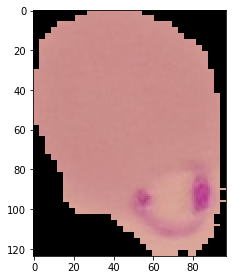

In [10]:
imshow(img)

In [12]:
df["label"][rm]

0

# Creating hog features

In [17]:
from skimage.feature import hog
train_features=[]
for i in train_f:
    image=imread(os.path.join(base_path,i))
    image=resize(image,(128,64))
    features,hog_image=hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,multichannel=True)
    train_features.append(features)
    


In [22]:
from skimage.feature import hog
test_features=[]
for i in test_f:
    image=imread(os.path.join(base_path,i))
    image=resize(image,(128,64))
    features,hog_image=hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,multichannel=True)
    test_features.append(features)

In [19]:
test_f

10459    1
3044     0
4314     1
9767     0
16212    0
        ..
1607     1
3915     0
14729    0
4367     0
15715    1
Name: label, Length: 17361, dtype: int32

# Model building

# Logistic Regression


In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(train_features,train_l)

print("Test score=",100*lr.score(test_features,test_l),"%")

Test score= 82.89269051321928 %


C:\Users\ItsMeVanquisher\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(train_features,train_l)


print("Test score=",100*rf.score(test_features,test_l),"%")

Test score= 82.58164852255054 %


# Predicting a particular image


In [3]:
img_features=[]
img=imread(r"C:\Users\ItsMeVanquisher\Downloads\malariabloodcellimg")
img=resize(image,(128,64))
features,hog_image=hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,multichannel=True)
img_features.append(features)

NameError: name 'imread' is not defined

In [2]:
lr.predict(img_features)

NameError: name 'lr' is not defined